In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [3]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 31ms/step - accuracy: 0.8941 - loss: 0.3385 - val_accuracy: 0.9835 - val_loss: 0.0493
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 28ms/step - accuracy: 0.9846 - loss: 0.0520 - val_accuracy: 0.9835 - val_loss: 0.0479
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9884 - loss: 0.0356 - val_accuracy: 0.9884 - val_loss: 0.0401
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9929 - loss: 0.0235 - val_accuracy: 0.9911 - val_loss: 0.0298
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9921 - val_loss: 0.0295
313/313 - 3s - 10ms/step - accuracy: 0.9921 - loss: 0.0295

Test accuracy: 0.9921000003814697


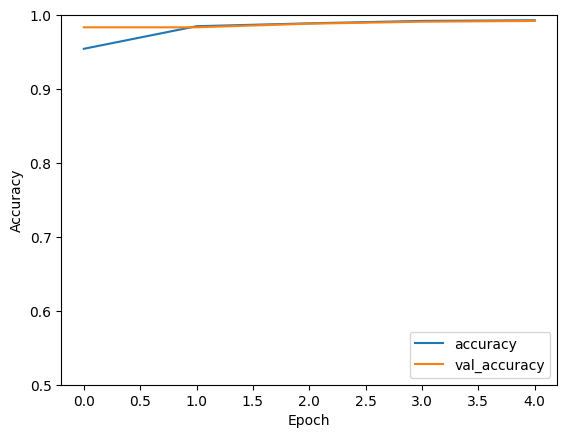

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()